## Decision Trees vs Decision Trees with Bagging

In this notebook, I will compare a simple Decision Tree Algorithm with a Decision Tree algorithm with Bagging

### Importing the data

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

### Splitting the data into training and test sets

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy of Decision Tree: {accuracy_tree*100}%')

Accuracy of Decision Tree: 82.0%


### Bagging Classifier

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    random_state=42
)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

accuracy_bag = accuracy_score(y_test, y_pred_bag)
print(f'Accuracy of Bagging Classifer: {accuracy_bag*100}%')

Accuracy of Bagging Classifer: 90.0%


### Conclusion

Here we can see that the ***BaggingClassifier*** has a better accuracy score when compared to the simple ***DecisionTreeClassifier***. We can fine-tune the hyperparameters further using *GridSearchCV* or *RandomizedSearchCV*. But let's look at the visual difference between the two.

### Visualizing the difference between the two classifiers

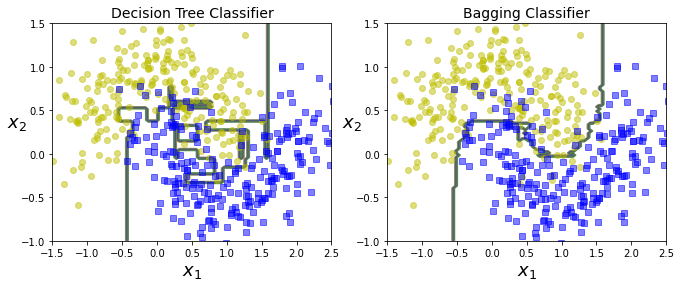

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    """Function for plotting the decision boundary of the given classifier"""
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    if contour:
        custom_cmap = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap, alpha=0.8)
    else:
        custom_cmap2 = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
        plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap2)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.ylabel(r'$x_2$', fontsize=18, rotation=0)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title('Decision Tree Classifier', fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title('Bagging Classifier', fontsize=14)
plt.show()

As we can see a Decision Tree with Bagging generalizes better when compared to the simple Decision Tree.